<a href="https://colab.research.google.com/github/joaoaxerb/Data-Science/blob/master/CreditCardFrauds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud detection in online transactions**
---
As predicted,  since the *Coronavirus* outbreak, online sales has been growing at an astronomous rate worldwide. Global eCommerce sales rose 28 percent in June 2020 compared to June 2019, making it the largest year-over-year increase in sales since *COVID-19* restrictions were put in place in March, per [ACI Worldwide](https://www.businesswire.com/news/home/20200713005612/en/ACI-Worldwide-Research-Reveals-Increase-June-eCommerce?utm_source=Triggermail&utm_medium=email&utm_campaign=Post%20Blast%20bii-payments-and-commerce:%20June%20e-commerce%20growth%20was%20the%20highest%20of%20the%20pandemic%20so%20far%20%7C%20Alipay%20counts%201.3B%20users%20%7C%20Amex%20launches%20proprietary%20payables%20tool&utm_term=BII%20List%20PayCom%20ALL).

With the high volume of transactions, comes a higher number of fraudulent transactions, and that's due to the fact that criminals also evolve, and use the same technological advancements as credit cards companies.

Detecting fraudulent transactions with a high accuracy is a challenge companies will face for years to come as it gets more complex year after year.

## **The Project** 

In this notebook I will develop a Machine Learning model to detect fraudulent transactions, and check the results in order to evaluate the model's performance. I will be using the `scikit-learn` library to construct a *Logistic Regression Model*.

If you like to uderstand how  *Logist Regression* model work, I'll list below a great article on it: 
* [Introduction to Logistic Regression](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148).

## **The Data**

The data used in this analysis was provided by a few European credit card companies, and uploaded by [Kaggle]() and is available for anybody. 

The [*Dataset*]() represent online transactions that took place in a spam of two days, and contains about **290 thousand** transactions. Only **490** of them were classified as fraudulent, which represents **0.17%** of the *Dataset*.

As we can see, the data is clearly unbalanced,  and thats is something that could affect the model, but dont't worry about it, there are techniques to solve that problem.

It is also important to state that all of the *features* of this Dataset are numerical and have been uncharacterized, for privacy and security. That means the columns have been renamed and are represented by $[V1, V2, V3 \dots, V28]$. 




### **Exploratory Data analysis**

First of all, I'll import the *Dateset* and make an initial analysis in order to uderstand what I'm dealing with.






In [42]:
# Import necessary packages
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# Import Dataset
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

# Visualize daset shape and  first five lines 
print("Dimensions: {}".format(df.shape))
df.head()

Dimensions: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This *Dataset* contains **284.807** lines and **31** columns.

Now, I'm going to print out the statistical report for each of the columns in the *Datset*.


In [ ]:
# Print statistical report
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


By printing out this report, I can understand which columns have a higher standart deviation, and it could help in identifying outliers in our data.



its always good to have perfect data, but that's basically impossible, which is why we have to check our *Dataset* for missing values. 

In [ ]:
# Print missing values percentages
df.isnull().sum() / df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

This *Dataset* contains no missing values! But don't get used to it, the only reason why the data is so clean is because it has been pre-processed beforehand.

Right now, I'm going to plot a bar chart in order to visualize how unbalanced the data is.

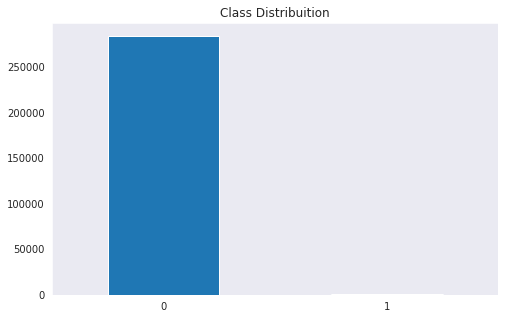

In [ ]:
# Plotting bar chart
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style('dark')

df.Class.value_counts().plot(kind='bar',ax=ax )
plt.xticks(rotation='horizontal')
plt.title("Class Distribuition")
plt.show()

As we can see on the bar chart above, the data is clearly unbalanced as I previously stated. I will print below the exact number of each class so we can have a better idea of it. 

In [ ]:
# Print Class values 
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

We've got **284.315** samples classified as 0, which means legal transactions, and **492** classified as 1, which means fraudulent transactions.

Right now, I'm going to plot two histograms for the variable `time`, one of them for *legal* transactions and the other one for *fraudulent* trasactions so we can compare the frequencies and try to extract some information from it that could help our model classify these samples.


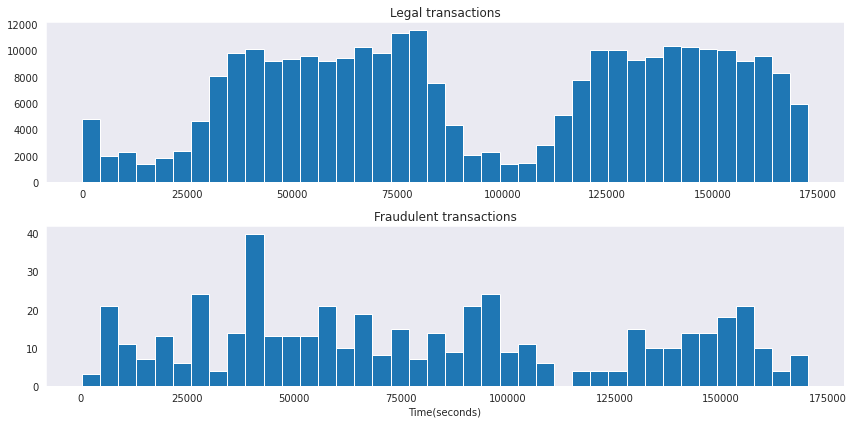

In [ ]:
# plot hsitogram 
fig,ax = plt.subplots(2,1, figsize=(12,6))
num_bins=40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title("Legal transactions")

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title("Fraudulent transactions")
ax[1].set_xlabel("Time(seconds)")

plt.tight_layout()

We can't really tell anything from looking at this histograms other that fraudulent transactions represent a small fraction of the *Dataset*.

Now I'm going to plot the histograms for the variable `amount`.

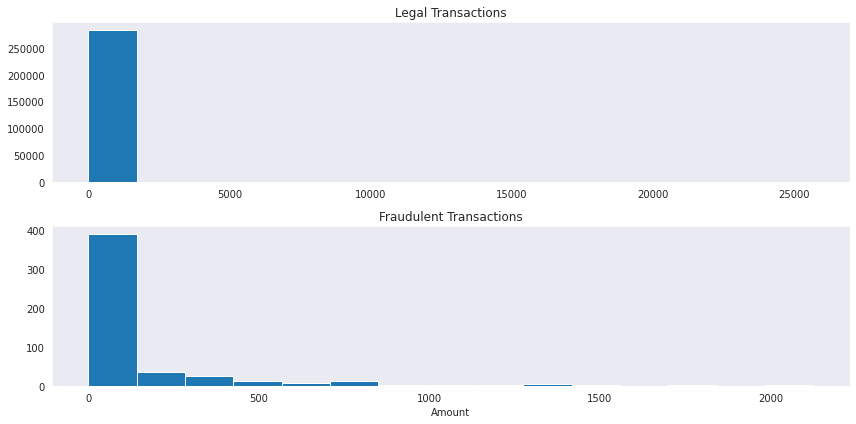

In [ ]:
# Plot histograms
fig, ax = plt.subplots(2,1, figsize=(12,6))

ax[0].hist(df.Amount[df.Class == 0], bins=15)
ax[0].set_title("Legal Transactions")

ax[1].hist(df.Amount[df.Class == 1], bins=15)
ax[1].set_title("Fraudulent Transactions")
ax[1].set_xlabel("Amount")
plt.tight_layout()

We can tell that legal transactions tend to have **lower** amounts, while **high** amounts are more frequent among fraudulent transactions.

Right now I'm going to plot boxplots for the variable `Amount`, for both **legal** and **fraudulent** transactions so that we can visualize the descrepancies between the categories.

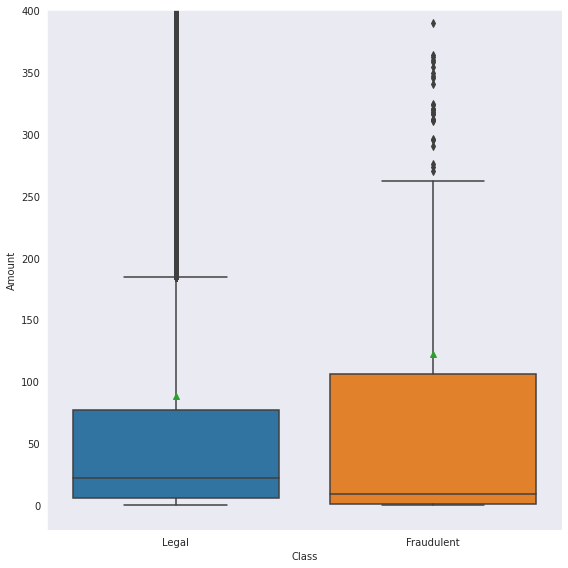

In [ ]:
# Plot boxplots
fig, ax = plt.subplots(figsize=(8,8))

sns.boxplot(df.Class, df.Amount,showmeans=True,  ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Legal', 'Fraudulent'])

plt.tight_layout()

Let's see what the boxplots are telling us. We can tell there are diferences by looking at it. I'll print below, stats on the Amount for both categories so we can compare.

In [48]:
# print Stats for Amount for Legal Transactions
print("Legal Transactions: \n ", df.Amount[df.Class == 0].describe(), "\n \nFraudulent Transactions: \n",df.Amount[df.Class == 1].describe() )

Legal Transactions: 
  count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64 
 
Fraudulent Transactions: 
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


From comparing both statistical reports for the column `Amount`, we can tell that fraudulent transactions shows a higher average 'Amount' value with a mean of **122.21**, while legal transactions shows a average of **88.29**.

### **Preparing the Data**

Now I a going to prepare the data in order to build the *Machine Learning* model. 

For the *Logistic Regression* model, it is required that every single variable of the *Dataset* is standardized. As we can see, the variables `Time` and `Amount` have not been standardized, so I'm going to do that now.

In [8]:
# standardize columns Time and Amount
df_clean = df.copy()

scaler = StandardScaler()
df_clean['std_Time'] = scaler.fit_transform(df_clean.Time.values.reshape(-1,1))
df_clean['std_Amount'] = scaler.fit_transform(df_clean.Amount.values.reshape(-1,1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Time,std_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


Now that every single column of the *Dataset* is standardized, I'll divide the data for **train** and **test** samples.


In [3]:
# Dividing in feature matrix and target vector
x = df_clean.drop('Class', axis=1)
y = df.Class

# Spliting into train and test samples
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, shuffle=True)

As I stated in the begining of this project, the data is exremely unbalanced, that means that most of the  *Dataset* consists of legal transactions samples.

That could be a problem for the model, because if we use unbalanced data to train our *Machine Learning* project, the model will tend to classify many samples wrongfully.

In order to fix that, I'm going to use the libary `imblearn` to balance our data correctly.

In this case, I'm going to use the *under-sampling* technique, that means I'm going to randomly delete samples from the majoritary Class, which is the **Legal Transactions**. By doing that I'm able to maximize the model's performance for the minority Class, which is **Fraudulent Transactions**.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


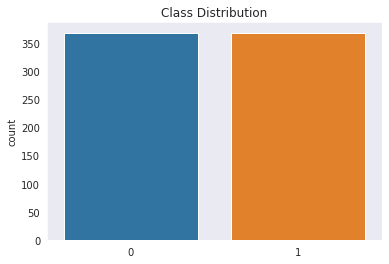

In [49]:
# uder-sampling the dataset
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_sample(x_train, y_train)

# Plot Class distribution
sns.set_style('dark')
sns.countplot(y_rus)
plt.title("Class Distribution")
plt.show();

As we can see in the bar chart above, the classes are now equally ditributed,and the data is now balanced.

### **The Machine Learning Model**

With the data properly structured, I'm going to build a classification model, using *Logistic Regression*, intended to classify the samples above as **Legal** or **Fraudulent Transactions**, using the train and test data specified above. 

In [10]:
# Choose and import a model
from sklearn.linear_model import LogisticRegression

# Create an instace for the model
logisticModel = LogisticRegression()

# Train the model
logisticModel.fit(x_rus, y_rus)

# Make predictions on test data
y_pred = logisticModel.predict(x_test)
y_prob = logisticModel.predict_proba(x_test)

Now that I have built the *Logistic Regression* model, trained it, and predicted the test data, it's time to evaluate it's preformance.

I'll plot below a confusion matrix, and print out the classification report in order to understand how well the model performed.

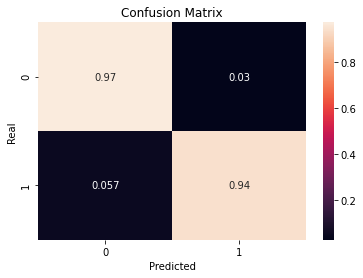

In [33]:
# Import Consusion Matrix metric
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize="true"), ax=ax, annot=True)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Real")

plt.show()

From looking at the Confusion Matrix above, we can see some pretty good results. The model classified **94%** of **Fraudulent** transacitons correctly, and **97%** of **Legal** transactions correctly. 

I'm going print below the classification report and check **accuracy**, **precision**,  and **recall** numbers.

In [41]:
# Print classification report
print("Classification Report: \n",classification_report(y_test, y_pred, digits=4))

Classification Report: 
               precision    recall  f1-score   support

           0     0.9999    0.9701    0.9848     71079
           1     0.0517    0.9431    0.0980       123

    accuracy                         0.9700     71202
   macro avg     0.5258    0.9566    0.5414     71202
weighted avg     0.9983    0.9700    0.9832     71202



For unbalanced Datasets, accuracy isn't a great way to evaluate the model's performance, due to the fact that the model could be extremely accurate and still only detect 60 or less percent of Fraudulent transactions. The ideal here is to look at the recall, or just focus on the confusion matrix.

### **Conclusion**
The model performed better than I expected, but I'm no Machine Learnig expert(yet). I didnt't have to do much work pre-processing the data because it was as clean as it gets, and even though we may believe that  there aren't many diferences between Legal and fraudulent transactions, this Machine Learning model showed us that there are, and that we can classify and prevent them. 

